In [5]:
import numpy as np
from timeseriespy.comparator.metrics import metrics
from timeseriespy.comparator.comparator import query, pairwise_argmin
import matplotlib.pyplot as plt
from timeseriespy.comparator.dynamic_time_warping import dtw_matrix, dtw_path
from timeseriespy.clustering.kmeans import KMeans
import time

## Data Creation

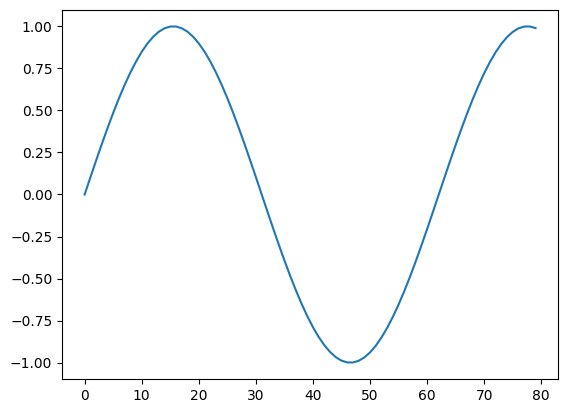

In [6]:
q = np.sin(np.linspace(0, 8, 80))
plt.plot(q)

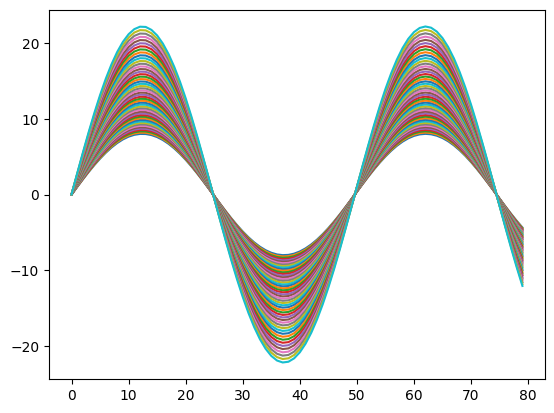

In [7]:
c = np.array([np.sin(np.linspace(0, 10, 80))*.5**(-i*.3) for i in np.arange(10,15,.1)])
for i, arr in enumerate(c):
    plt.plot(arr)

## DTW

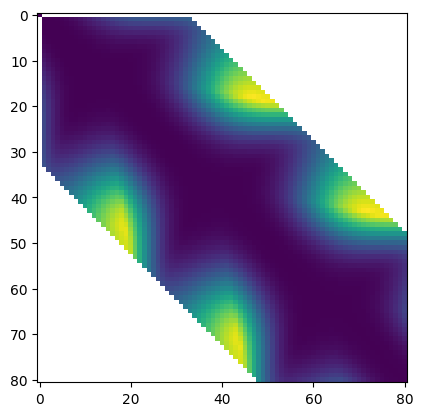

In [8]:
plt.imshow(dtw_matrix(c[0], c[5], .4))

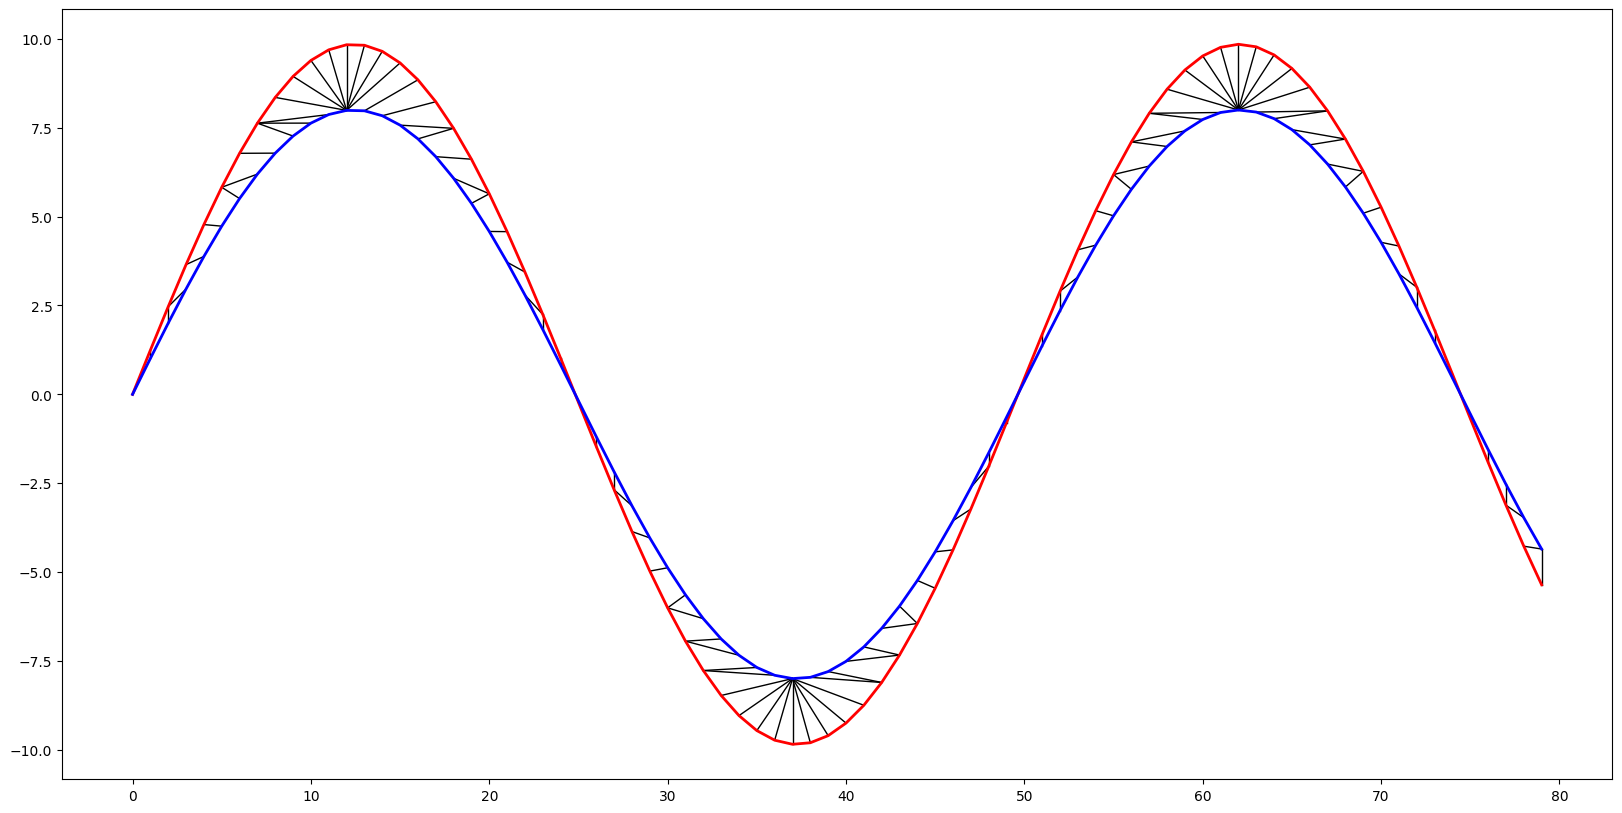

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))

x, y = c[10], c[0]

path = dtw_path(dtw_matrix(x, y))

for [map_x, map_y] in path:
    ax.plot([map_x, map_y], [x[map_x], y[map_y]], '-k', lw = 1)

ax.plot(x, color='red', linewidth=2)
ax.plot(y, color='blue', linewidth=2);

## query()
### queries a 2d array to find index of closest time series

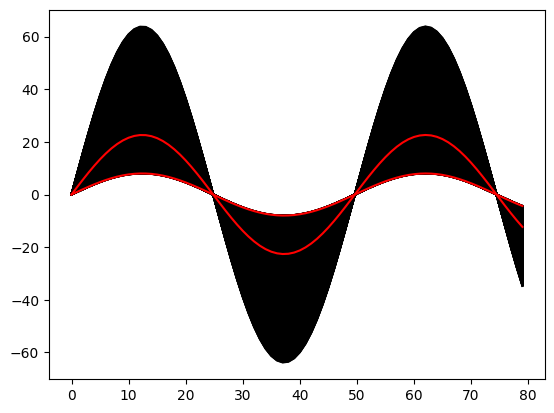

In [10]:
C = np.array([np.sin(np.linspace(0, 10, 80))*.5**(-i*.3) for i in np.arange(10,20,.01)])
for arr in C:
    plt.plot(arr, color = 'black')

i = 500

q = C[i]

plt.plot(q, color = 'red')
plt.plot(C[0], color = 'red')

C = np.delete(C, i, 0)

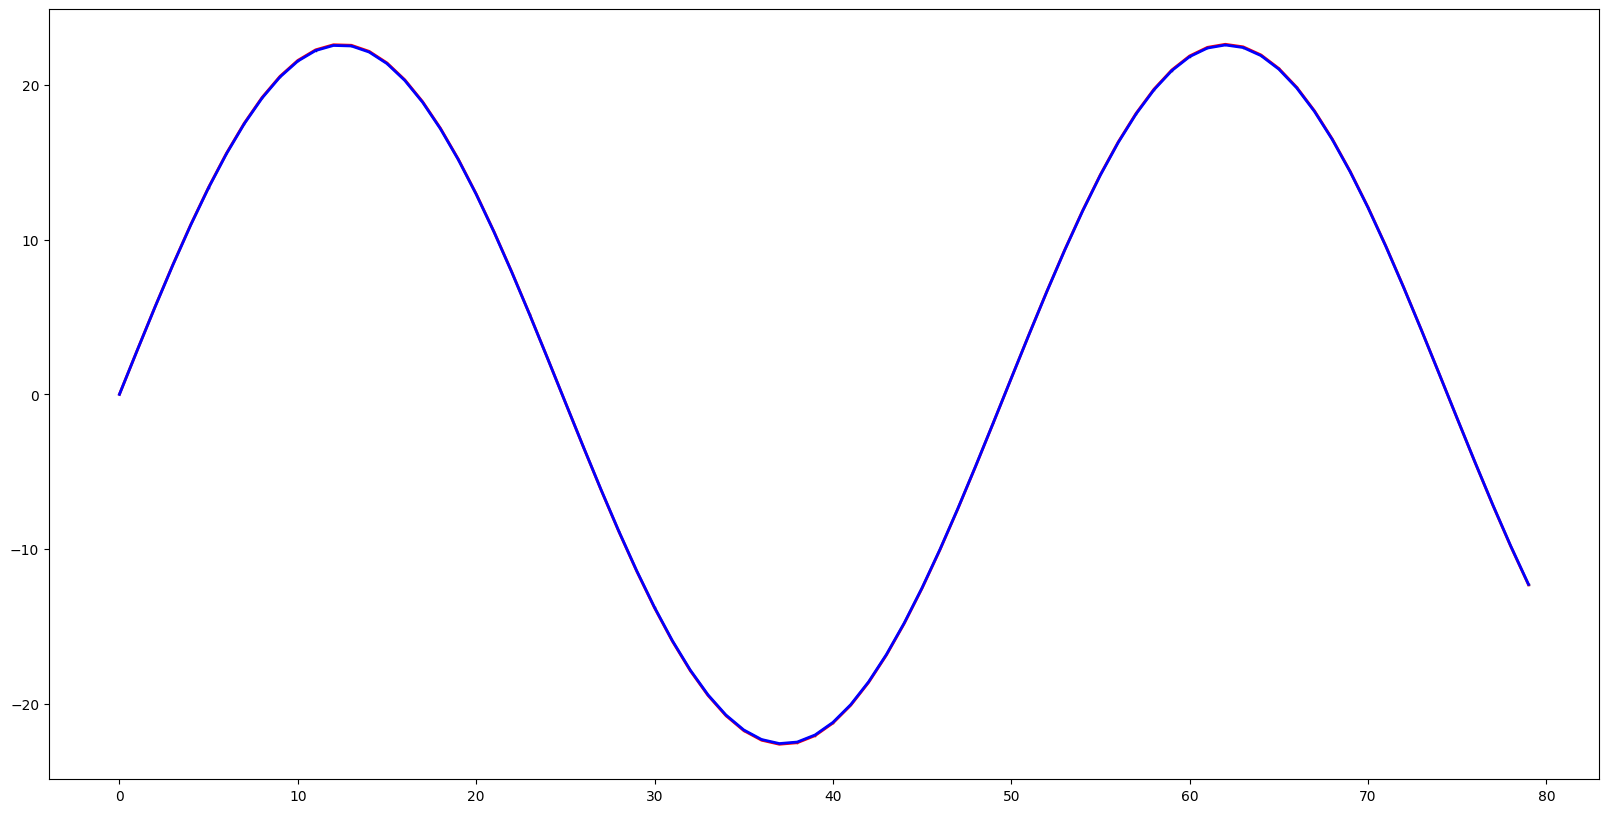

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))

x, y = q, C[499]

path = dtw_path(dtw_matrix(x, y, w = 0.5 ))

for [map_x, map_y] in path:
    ax.plot([map_x, map_y], [x[map_x], y[map_y]], '-k', lw = 1)

ax.plot(x, color='red', linewidth=2)
ax.plot(y, color='blue', linewidth=2);

In [12]:
from timeseriespy.comparator.metrics import metrics

metrics['dtw'](q, C[0])

80.3501969046958

In [18]:

metrics['dtw'](q, C[499])

0.08363317470838097

In [13]:
# sequential query

start = time.time()
print(query(q, C, w = 0.4, parallel_cores = 1))
end = time.time()
print(f'{(end - start):4f} seconds')

best_so_far inf i 0
best_so_far 80.35 i 1
best_so_far 80.35 i 2
best_so_far 80.35 i 3
best_so_far 80.35 i 4
best_so_far 80.35 i 5
best_so_far 80.35 i 6
best_so_far 80.35 i 7
best_so_far 80.35 i 8
best_so_far 80.35 i 9
best_so_far 80.35 i 10
best_so_far 80.35 i 11
best_so_far 80.35 i 12
best_so_far 80.35 i 13
best_so_far 80.35 i 14
best_so_far 80.35 i 15
best_so_far 80.35 i 16
best_so_far 80.35 i 17
best_so_far 80.35 i 18
best_so_far 80.35 i 19
best_so_far 80.35 i 20
best_so_far 80.35 i 21
best_so_far 80.35 i 22
best_so_far 80.35 i 23
best_so_far 80.35 i 24
best_so_far 80.35 i 25
best_so_far 80.35 i 26
best_so_far 80.35 i 27
best_so_far 80.35 i 28
best_so_far 80.35 i 29
best_so_far 80.35 i 30
best_so_far 80.35 i 31
best_so_far 80.35 i 32
best_so_far 80.35 i 33
best_so_far 80.35 i 34
best_so_far 80.35 i 35
best_so_far 80.35 i 36
best_so_far 80.35 i 37
best_so_far 80.35 i 38
best_so_far 80.35 i 39
best_so_far 80.35 i 40
best_so_far 80.35 i 41
best_so_far 80.35 i 42
best_so_far 80.35 i 43


In [14]:
# Parallel query

start = time.time()
print(query(q, C, w = 0.4, parallel_cores = 4))
end = time.time()
print(f'{(end - start):4f} seconds')

499
1.703100 seconds


In [15]:
np.inf**2

inf

## pairwise_argmin()
### returns the index of the array that is cumulatively closest in distance to all others

In [16]:
# sequential implementation

start = time.time()
print(pairwise_argmin(C, w = 0.5, parallel = False))
end = time.time()
print(f'{(end - start):4f} seconds')

KeyboardInterrupt: 

In [ ]:
# Parallel implementation

start = time.time()
print(pairwise_argmin(C, w = 0.5, parallel = True))
end = time.time()
print(f'{(end - start):4f} seconds')

499
18.424373 seconds


## KMEANS

In [ ]:
start = time.time()

X = c
km = KMeans(n_init = 100, k_clusters = 4, max_iter = 100, centroids = [], metric = 'dtw', averaging = 'interpolated')
km.fit(X, parallel = True)
km.clusters

end = time.time()
print(f'{(end - start):4f} seconds')

5.231873 seconds


In [ ]:
start = time.time()

X = c
km = KMeans(n_init = 100, k_clusters = 3, max_iter = 100, centroids = [], metric = 'dtw', averaging = 'interpolated')
km.fit(X, parallel = False)
km.clusters

end = time.time()
print(f'{(end - start):4f} seconds')

26.675611 seconds


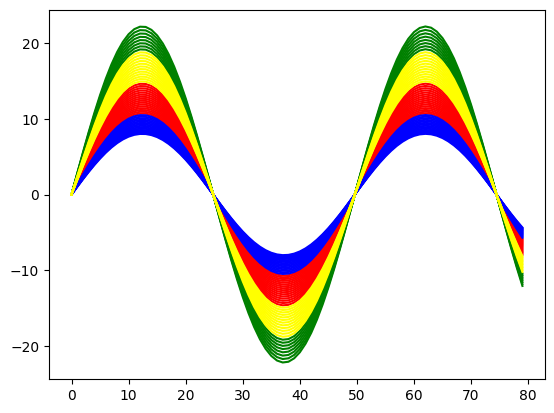

In [ ]:
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'black', 'brown', 'grey']
for color, val in enumerate(set(km.clusters)):
    cluster = X[np.where(km.clusters == val)[0]]
    for arr in cluster:
        plt.plot(arr, color=colors[color])

## timeseries and shapelet extraction

In [ ]:
from timeseriespy.timeseries.timeseries import TimeSeries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
series = np.random.rand(100, 7)

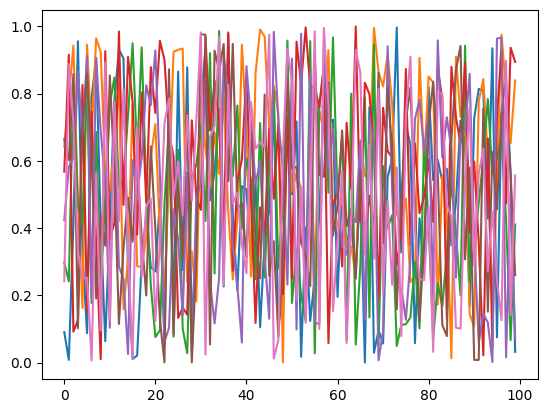

In [ ]:
plt.plot(series);

In [ ]:
series = np.sin(np.linspace(0, 10, 1000)+ np.random.rand(1000)*.31)

In [ ]:
ts = TimeSeries(series)

In [ ]:
ts.random_shapelet(100)

4.299781197719972
inf
inf
inf
18.932652525876836
inf
inf
inf
4.736752361930867
8.991208823700719
inf
inf
19.101032135169575
17.21267117156001
inf
11.734865321975708
0.22233680250612473
inf
1.1690960638027388
1.542245663226774
4.682984050497904
inf
inf
17.364861215135544
inf
inf
inf
inf
0.7850413840387626
inf
inf
1.0143245534151013
inf
1.4132639303580858
inf
8.690893850760192
inf
18.63267389925046
2.8691715503555497
inf
19.249759671564814
13.109870572056156
inf
inf
inf
inf
inf
inf
inf
14.13133708306363
inf
9.769393844655404
17.947598071515703
inf
8.098374488263746
11.88087695267138
inf
inf
inf
15.21436407114695
inf
inf
inf
inf
inf
5.3325015518256995
inf
inf
8.036767590965649
inf
5.835360307012828
inf
inf
14.832083026426554
inf
15.015062843408561
0.49777267672879144
0.2363080925820014
inf
inf
inf
4.432867291264781
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
2.5128666917786466
4.299781197719972
inf
inf
4.843153609189527
inf
inf
inf
inf
inf
inf
inf
0.2696533324927854
18

TypeError: list indices must be integers or slices, not NoneType